# **Kriteria 1: Melakukan Eksperimen terhadap Dataset Pelatihan**

**Basic (2 pts)**

- Melakukan tahapan experimentation secara manual.
- Melakukan data loading pada notebook.
- Melakukan EDA pada notebook.
- Melakukan preprocessing pada notebook.

**Skilled (3 pts)**
- Tahap basic terpenuhi.
- Membuat sebuah file automate_Nama-siswa.py yang berisikan fungsi untuk melakukan preprocessing secara otomatis sehingga mengembalikan data yang siap dilatih.
- Pada tahap ini Anda harus melakukan konversi dari proses eksperimen sebelumnya, sehingga tahapannya harus sama tetapi memiliki struktur yang berbeda.

**Advance (4 pts)**
- Tahap skilled terpenuhi.
- Membuat sebuah workflow pada GitHub Actions agar dapat melakukan preprocessing setiap kali trigger terpantik.
- Anda harus membuat sebuah repository dengan nama Eksperimen_SML_Nama-siswa berisi seluruh file yang sama dengan rekomendasi struktur folder pada kriteria 1.
- Pastikan Actions yang dibuat mengembalikan sebuah dataset terbaru yang sudah diproses sedemikian rupa.

## **1. Perkenalan Dataset**



**1. Sumber Dataset**:  
Dataset yang digunakan adalah Instax Sales Transaction Dataset yang diperoleh dari Kaggle (public dataset). Dataset ini berisi data transaksi penjualan produk Fujifilm Instax dengan rentang waktu Mei 2022 hingga Mei 2025.


**Informasi Umum Dataset**
- Sumber: Kaggle
- Jumlah data: ±10.000 baris
- Rentang waktu: Mei 2022 – Mei 2025
- Jenis data: Data terstruktur (tabular)
- Mata uang: IDR

**Atribut Dataset**
- Tanggal
- Tahun
- Bulan
- Hari
- Kategori
- Nama_Produk
- Lokasi_Toko
- Metode_Bayar
- Harga_Satuan
- Qty
- Diskon_IDR
- Total_Penjualan

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
get_ipython().system('pip install mlflow==2.19.0 scikit-learn matplotlib seaborn')

In [2]:
import mlflow
print(f"MLflow Version: {mlflow.__version__}")

MLflow Version: 2.19.0


In [3]:
# Pastikan pyngrok terinstal
get_ipython().system('pip install pyngrok')

In [4]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess
import time
import mlflow
import mlflow.sklearn
import sys

from pyngrok import ngrok
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from automate_ShifaNabila import preprocess_data
sys.path.append('.')
plt.style.use("seaborn-v0_8")

# **3. Memuat Dataset**

In [5]:
# Memuat dataset
df = pd.read_csv("instax_sales_transaction_data.csv")

# Menampilkan 5 baris pertama
df.head()

,Tanggal,Tahun,Bulan,Hari,Kategori,Nama_Produk,Lokasi_Toko,Metode_Bayar,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
0,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,9250,175750
1,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,0,185000
2,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000
3,2022-05-01,2022,5,Sunday,Kamera,Instax Mini 11,Shopee Mall,Paylater,1100000,1,0,1100000
4,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# Informasi Dasar Dataset
print("\n--- Eksplorasi Data Awal ---")

# Menampilkan tipe data & jumlah non-null
print("\n[Info] Tipe Data & Jumlah Non-Null:")
df.info()

# Statistik deskriptif fitur numerik
print("\n[Info] Statistik Deskriptif:")
display(df.describe())

# Melihat jumlah missing value
df.isnull().sum()


--- Eksplorasi Data Awal ---

[Info] Tipe Data & Jumlah Non-Null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12334 entries, 0 to 12333
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tanggal          12334 non-null  object
 1   Tahun            12334 non-null  int64 
 2   Bulan            12334 non-null  int64 
 3   Hari             12334 non-null  object
 4   Kategori         12334 non-null  object
 5   Nama_Produk      12334 non-null  object
 6   Lokasi_Toko      12334 non-null  object
 7   Metode_Bayar     12334 non-null  object
 8   Harga_Satuan     12334 non-null  int64 
 9   Qty              12334 non-null  int64 
 10  Diskon_IDR       12334 non-null  int64 
 11  Total_Penjualan  12334 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB

[Info] Statistik Deskriptif:


,Tahun,Bulan,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
count,12334.000000,12334.000000,1.233400e+04,12334.000000,1.233400e+04,1.233400e+04
mean,2023.485244,6.790011,3.989071e+05,1.940814,1.290899e+04,5.205712e+05
std,0.928167,3.872200,6.915002e+05,1.151353,4.618240e+04,7.033379e+05
min,2022.000000,1.000000,5.000000e+04,1.000000,0.000000e+00,4.000000e+04
25%,2023.000000,3.000000,9.500000e+04,1.000000,0.000000e+00,1.500000e+05
50%,2024.000000,7.000000,1.500000e+05,2.000000,0.000000e+00,2.707500e+05
75%,2024.000000,10.000000,1.850000e+05,3.000000,7.500000e+03,5.272500e+05
max,2025.000000,12.000000,2.900000e+06,5.000000,1.160000e+06,5.800000e+06


,0
Tanggal,0
Tahun,0
Bulan,0
Hari,0
Kategori,0
Nama_Produk,0
Lokasi_Toko,0
Metode_Bayar,0
Harga_Satuan,0
Qty,0


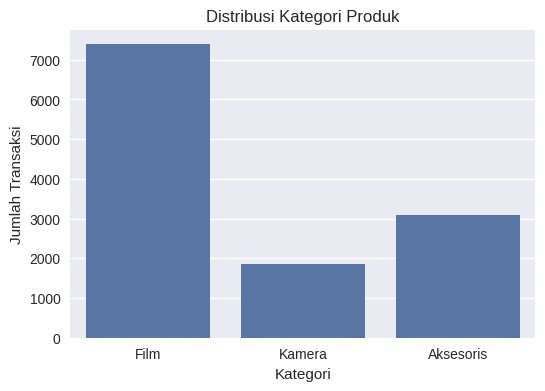

In [7]:
# Distribusi Kategori Produk
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Kategori")
plt.title("Distribusi Kategori Produk")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Transaksi")
plt.show()

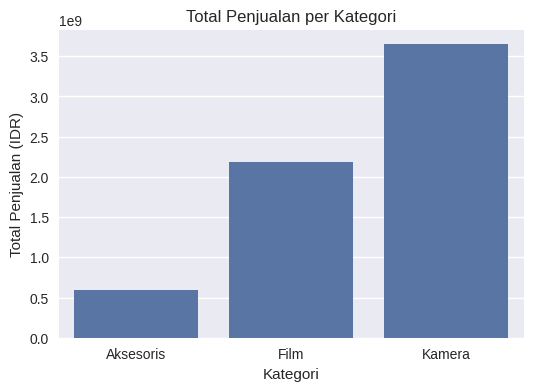

In [8]:
# Total Penjualan per Kategori
sales_per_category = df.groupby("Kategori")["Total_Penjualan"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=sales_per_category, x="Kategori", y="Total_Penjualan")
plt.title("Total Penjualan per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Total Penjualan (IDR)")
plt.show()

# **5. Data Preprocessing**

In [9]:
# Mengecek jumlah data kosong
df.isnull().sum()

# Menghapus baris yang memiliki nilai kosong (jika ada)
df_clean = df.dropna()

In [10]:
# Mengecek dan menghapus data duplikat
df_clean = df_clean.drop_duplicates()
print("Jumlah data setelah hapus duplikat:", len(df_clean))

Jumlah data setelah hapus duplikat: 12205


In [11]:
# Mengubah kolom Tanggal menjadi format datetime
df_clean["Tanggal"] = pd.to_datetime(df_clean["Tanggal"])

In [12]:
# Encoding kolom kategorikal menggunakan one-hot encoding
df_encoded = pd.get_dummies(
    df_clean,
    columns=["Kategori", "Lokasi_Toko", "Metode_Bayar"],
    drop_first=True
)

In [13]:
# Memilih fitur numerik utama
df_final = df_encoded[[
    "Harga_Satuan",
    "Qty",
    "Diskon_IDR",
    "Total_Penjualan"
]]

In [14]:
# Cek ulang apakah data sudah bersih
df_clean.isnull().sum()
df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12333
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Tanggal          12205 non-null  datetime64[ns]
 1   Tahun            12205 non-null  int64         
 2   Bulan            12205 non-null  int64         
 3   Hari             12205 non-null  object        
 4   Kategori         12205 non-null  object        
 5   Nama_Produk      12205 non-null  object        
 6   Lokasi_Toko      12205 non-null  object        
 7   Metode_Bayar     12205 non-null  object        
 8   Harga_Satuan     12205 non-null  int64         
 9   Qty              12205 non-null  int64         
 10  Diskon_IDR       12205 non-null  int64         
 11  Total_Penjualan  12205 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 1.2+ MB


,Tanggal,Tahun,Bulan,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
count,12205,12205.000000,12205.000000,1.220500e+04,12205.000000,1.220500e+04,1.220500e+04
mean,2024-01-03 04:16:15.731257600,2023.483245,6.793445,3.992397e+05,1.944941,1.292458e+04,5.215125e+05
min,2022-05-01 00:00:00,2022.000000,1.000000,5.000000e+04,1.000000,0.000000e+00,4.000000e+04
25%,2023-04-12 00:00:00,2023.000000,3.000000,9.500000e+04,1.000000,0.000000e+00,1.500000e+05
50%,2024-01-13 00:00:00,2024.000000,7.000000,1.500000e+05,2.000000,0.000000e+00,2.707500e+05
75%,2024-10-19 00:00:00,2024.000000,10.000000,1.850000e+05,3.000000,7.500000e+03,5.272500e+05
max,2025-05-01 00:00:00,2025.000000,12.000000,2.900000e+06,5.000000,1.160000e+06,5.800000e+06
std,NaN,0.927732,3.870447,6.916176e+05,1.153600,4.619824e+04,7.038178e+05


In [15]:
# Menyimpan dataset hasil preprocessing
df_final.to_csv("instax_sales_preprocessing.csv", index=False)

In [16]:
# Membuat File Automate_ShifaNabila.py

%%writefile automate_ShifaNabila.py
import pandas as pd
import numpy as np

def preprocess_data(raw_data_path):
    """
    Performs preprocessing on the raw Instax sales transaction data.

    Args:
        raw_data_path (str): The file path to the raw dataset (CSV).

    Returns:
        pandas.DataFrame: The preprocessed DataFrame.
    """
    # 1. Muat dataset
    df = pd.read_csv(raw_data_path)

    # 2. Hapus baris yang mengandung nilai kosong
    df_clean = df.dropna()

    # 3. Hapus data duplikat
    df_clean = df_clean.drop_duplicates()

    # 4. Konversi kolom 'Tanggal' ke tipe data datetime
    df_clean["Tanggal"] = pd.to_datetime(df_clean["Tanggal"])

    # 5. Lakukan one-hot encoding pada kolom kategorikal
    df_encoded = pd.get_dummies(
        df_clean,
        columns=["Kategori", "Lokasi_Toko", "Metode_Bayar"],
        drop_first=True
    )

    # 6. Pilih kolom-kolom untuk DataFrame akhir
    df_final = df_encoded[[
        "Harga_Satuan",
        "Qty",
        "Diskon_IDR",
        "Total_Penjualan"
    ]]

    # 7. Simpan DataFrame hasil preprocessing ke file CSV baru
    df_final.to_csv("instax_sales_preprocessing.csv", index=False)

    print(f"Data preprocessed and saved to instax_sales_preprocessing.csv. Shape: {df_final.shape}")

    return df_final

Writing automate_ShifaNabila.py


In [48]:
# Membuat File namadataset_preprocessing
# Panggil fungsi preprocess_data
raw_data_path = "instax_sales_transaction_data.csv"
preprocessed_df = preprocess_data(raw_data_path)

# Tampilkan 5 baris pertama dari DataFrame yang sudah diproses
print("\n--- 5 Baris Pertama DataFrame yang Sudah Diproses ---")
display(preprocessed_df.head())

# Tampilkan informasi DataFrame yang sudah diproses
print("\n--- Informasi DataFrame yang Sudah Diproses ---")
preprocessed_df.info()

Data preprocessed and saved to instax_sales_preprocessing.csv. Shape: (12205, 4)

--- 5 Baris Pertama DataFrame yang Sudah Diproses ---


,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
0,185000,1,9250,175750
1,185000,1,0,185000
2,185000,2,0,370000
3,1100000,1,0,1100000
5,95000,1,4750,90250



--- Informasi DataFrame yang Sudah Diproses ---
<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12333
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Harga_Satuan     12205 non-null  int64
 1   Qty              12205 non-null  int64
 2   Diskon_IDR       12205 non-null  int64
 3   Total_Penjualan  12205 non-null  int64
dtypes: int64(4)
memory usage: 476.8 KB


# **Kriteria 2: Membangun Model Machine Learning**

Setelah selesai melalui tahapan preprocessing, Anda harus melatih model menggunakan dataset yang sudah siap digunakan (bukan raw). Nantinya Anda harus membuat sebuah folder yang berisikan file modelling.py beserta dependencies nya dengan struktur seperti berikut.


**Reject (0 pts)**

- Tidak membuat model machine learning/deep learning menggunakan MLflow dan menyimpan artefak di MLflow Tracking UI.

- idak menyimpan informasi apa pun pada logging.

**Basic (2 pts)**

- Melatih model machine learning (Scikit-Learn) menggunakan MLflow Tracking UI yang disimpan secara lokal tanpa menggunakan hyperparameter tuning.

- Menggunakan autolog dari MLflow pada file modelling.py.

- Mengirimkan screenshot yang valid.

**Skilled (3 pts)**

- Kriteria Basic wajib terpenuhi.

- Melatih model machine learning/deep learning menggunakan MLflow Tracking UI yang disimpan secara lokal dengan menerapkan hyperparameter tuning.

- Alih-alih menggunakan autolog, Anda diharapkan menggunakan manual logging dengan metriks yang sama dengan autolog.

- Pastikan kamu melakukan checklist ini pada file modelling_tuning (bukan pada modelling.py)

**Advance (4 pts)**

- Melatih model machine learning/deep learning menggunakan MLflow Tracking UI yang disimpan secara online dengan DagsHub.

- Alih-alih menggunakan autolog, siswa diharapkan menggunakan manual logging dengan metriks yang tidak hanya tercover pada autolog (autolog + minimal 2 artefak tambahan).



In [49]:
%%writefile Membangun_model/requirements.txt
mlflow==2.19.0
scikit-learn==1.6.1
matplotlib==3.10.0
seaboard==0.13.2
pandas==2.2.2
numpy==2.0.2
pyngrok==7.5.0
Flask
waitress
requests
prometheus_client
dagshub

Overwriting Membangun_model/requirements.txt


#**1. Persiapan Data (Mentah & Preprocessing)**

Ini adalah kode untuk memastikan dataset mentah tersedia dan dataset yang sudah diproses (instax_sales_preprocessing.csv) dibuat serta disalin ke folder Membangun_model/.

In [22]:
raw_data_file = "instax_sales_transaction_data.csv"

df = pd.read_csv(raw_data_file)

output_path = os.path.join("/content/", raw_data_file)
df.to_csv(output_path, index=False)

print(f"Raw dataset '{raw_data_file}' loaded and re-saved to '{output_path}'.")
print("First 5 rows of the DataFrame 'df':")
display(df.head())

Raw dataset 'instax_sales_transaction_data.csv' loaded and re-saved to '/content/instax_sales_transaction_data.csv'.
First 5 rows of the DataFrame 'df':


,Tanggal,Tahun,Bulan,Hari,Kategori,Nama_Produk,Lokasi_Toko,Metode_Bayar,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
0,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,9250,175750
1,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,0,185000
2,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000
3,2022-05-01,2022,5,Sunday,Kamera,Instax Mini 11,Shopee Mall,Paylater,1100000,1,0,1100000
4,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000


In [23]:
%%writefile automate_ShifaNabila.py
import pandas as pd
import numpy as np

def preprocess_data(raw_data_path):
    """
    Performs preprocessing on the raw Instax sales transaction data.

    Args:
        raw_data_path (str): The file path to the raw dataset (CSV).

    Returns:
        pandas.DataFrame: The preprocessed DataFrame.
    """
    # 1. Muat dataset
    df = pd.read_csv(raw_data_path)

    # 2. Hapus baris yang mengandung nilai kosong
    df_clean = df.dropna()

    # 3. Hapus data duplikat
    df_clean = df_clean.drop_duplicates()

    # 4. Konversi kolom 'Tanggal' ke tipe data datetime
    df_clean["Tanggal"] = pd.to_datetime(df_clean["Tanggal"])

    # 5. Lakukan one-hot encoding pada kolom kategorikal
    df_encoded = pd.get_dummies(
        df_clean,
        columns=["Kategori", "Lokasi_Toko", "Metode_Bayar"],
        drop_first=True
    )

    # 6. Pilih kolom-kolom untuk DataFrame akhir
    df_final = df_encoded[[
        "Harga_Satuan",
        "Qty",
        "Diskon_IDR",
        "Total_Penjualan"
    ]]

    # 7. Simpan DataFrame hasil preprocessing ke file CSV baru
    df_final.to_csv("instax_sales_preprocessing.csv", index=False)

    print(f"Data preprocessed and saved to instax_sales_preprocessing.csv. Shape: {df_final.shape}")

    return df_final

Overwriting automate_ShifaNabila.py


# **2. Generate & Copy Preprocessed Data ke Membangun_model/**

In [25]:
import sys
sys.path.append('/content/') # Pastikan Python dapat menemukan automate_ShifaNabila.py
import shutil
import os

from automate_ShifaNabila import preprocess_data

# Pastikan folder Membangun_model ada
if not os.path.exists('Membangun_model'):
    os.makedirs('Membangun_model')
    print("Directory 'Membangun_model' created.")
else:
    print("Directory 'Membangun_model' already exists.")

# Panggil fungsi preprocess_data untuk menghasilkan instax_sales_preprocessing.csv di root
raw_data_path = "instax_sales_transaction_data.csv"
preprocessed_df = preprocess_data(raw_data_path)

print("Ensured 'instax_sales_preprocessing.csv' is freshly generated in the root directory.")

# Salin file hasil preprocessing ke folder Membangun_model/
source_path = "instax_sales_preprocessing.csv"
destination_dir = "Membangun_model/"
destination_path = os.path.join(destination_dir, source_path)

shutil.copy(source_path, destination_path)
print(f"File '{source_path}' copied to '{destination_path}'.")

print(f"\nContents of '{destination_dir}':")
print(os.listdir(destination_dir))

Directory 'Membangun_model' already exists.
Data preprocessed and saved to instax_sales_preprocessing.csv. Shape: (12205, 4)
Ensured 'instax_sales_preprocessing.csv' is freshly generated in the root directory.
File 'instax_sales_preprocessing.csv' copied to 'Membangun_model/instax_sales_preprocessing.csv'.

Contents of 'Membangun_model/':
['instax_sales_preprocessing.csv']


# **3.  Implementasi Basic (2 Poin): modelling.py dengan Autolog MLflow Lokal**

**Buat File modelling.py**

In [44]:
%%writefile Membangun_model/modelling.py
import mlflow # Tambahkan baris ini
import mlflow.sklearn
import pandas as pd # Import pandas
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
import os # Import os

# Enable MLflow autologging for scikit-learn
mlflow.sklearn.autolog()

def train_model():
    print(f"Current working directory: {os.getcwd()}")

    # Muat dataset (sudah disalin ke Membangun_model/)
    # Pastikan file instax_sales_preprocessing.csv ada di direktori Membangun_model/
    data_path = "instax_sales_preprocessing.csv"
    if not os.path.exists(data_path):
        print(f"Error: Dataset not found at {data_path}")
        return
    df = pd.read_csv(data_path)

    X = df.drop("Total_Penjualan", axis=1)
    y = df["Total_Penjualan"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Model training complete with MLflow autologging.")
    print("Check MLflow UI for experiment results: http://localhost:5000")

if __name__ == "__main__":
    train_model()

Overwriting Membangun_model/modelling.py


**Menjalankan modelling.py**

In [46]:
import subprocess

process = subprocess.run(["python", "Membangun_model/modelling.py"], capture_output=True, text=True)
print(process.stdout)
print(process.stderr)

Current working directory: /content
🏃 View run enchanting-swan-843 at: https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow/#/experiments/0/runs/1dbace4ac73d465cb883585b0e4f68e4
🧪 View experiment at: https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow/#/experiments/0
Model training complete with MLflow autologging.
Check MLflow UI for experiment results: http://localhost:5000

2025/12/19 02:34:15 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.1. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/12/19 02:34:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1dbace4ac73d465cb883585b0e4f68e4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/12/19 02:

In [33]:
print("\n--- Mengatur Authtoken ngrok ---")
get_ipython().system('ngrok authtoken 36v0E7CplzQ0Mk0VDFottpNAUvl_29kdf7oHbfCfpSq1AqpWJ')


--- Mengatur Authtoken ngrok ---
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [35]:
# 1. Hentikan semua proses MLflow UI yang mungkin sedang berjalan
print("Stopping any existing MLflow UI processes...")
subprocess.run(['pkill', '-f', 'mlflow ui'], capture_output=True, text=True)
ngrok.kill()
print("Existing MLflow UI and ngrok tunnels stopped.")

# 2. Jalankan MLflow UI di latar belakang secara lebih terisolasi
print("Starting MLflow UI...")

# Menggunakan subprocess.Popen agar kita bisa mendapatkan PID dan mengelola prosesnya
mlflow_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
print(f"MLflow UI process started with PID: {mlflow_process.pid}")

# Beri waktu beberapa detik agar MLflow UI sempat memulai servernya
time.sleep(5)
print("Waiting for MLflow UI to initialize...")

# Buat tunnel ngrok ke port 5000
print("Creating ngrok tunnel...")
try:
    public_url = ngrok.connect(5000)
    print("MLflow UI Public URL:", public_url)
    print("\n*** Salin URL di atas dan buka di browser Anda untuk melihat MLflow UI ***")
except Exception as e:
    print(f"Error creating ngrok tunnel: {e}")
    print("Pastikan authtoken ngrok Anda sudah benar dan aktif.")

Stopping any existing MLflow UI processes...
Existing MLflow UI and ngrok tunnels stopped.
Starting MLflow UI...
MLflow UI process started with PID: 6549
Waiting for MLflow UI to initialize...
Creating ngrok tunnel...
MLflow UI Public URL: NgrokTunnel: "https://tasha-untrading-disgustingly.ngrok-free.dev" -> "http://localhost:5000"

*** Salin URL di atas dan buka di browser Anda untuk melihat MLflow UI ***


# **4. Implementasi Skilled (3 Poin): modelling_tuning.py dengan Manual Log MLflow Lokal**


**Buat File modelling_tuning.py**

In [36]:
%%writefile Membangun_model/modelling_tuning.py
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow # Tambahkan import mlflow di sini
import mlflow.sklearn
import os
import numpy as np # Ensure numpy is imported for np.sqrt

def train_model_with_tuning():
    # Set MLflow tracking URI to a local directory explicitly
    mlflow.set_tracking_uri("file:///content/mlruns")
    mlflow.set_experiment("RandomForest_Tuning_Experiment")

    print(f"Current working directory: {os.getcwd()}")

    # Muat dataset (sudah disalin ke Membangun_model/)
    data_path = "instax_sales_preprocessing.csv"
    if not os.path.exists(data_path):
        print(f"Error: Dataset not found at {data_path}")
        return
    df = pd.read_csv(data_path)

    X = df.drop("Total_Penjualan", axis=1)
    y = df["Total_Penjualan"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    with mlflow.start_run(run_name="RandomForest_GridSearch_Tuning") as run:
        print(f"MLflow Run ID: {run.info.run_id}")

        param_grid = {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }

        # Inisialisasi model RandomForestRegressor
        rf = RandomForestRegressor(random_state=42)

        # Inisialisasi GridSearchCV
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

        # Lakukan hyperparameter tuning
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        best_score = -grid_search.best_score_
        best_model = grid_search.best_estimator_

        print("Best Parameters found:", best_params)
        print("Best MSE (from CV):", best_score)

        for param, value in best_params.items():
            mlflow.log_param(param, value)

        y_pred = best_model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        mlflow.log_metric("mae", mae)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2_score", r2)

        mlflow.sklearn.log_model(best_model, "random_forest_model_tuned")

        print("Model training and tuning complete with manual MLflow logging (local).")

if __name__ == "__main__":
    train_model_with_tuning()

Writing Membangun_model/modelling_tuning.py


**Menjalankan modelling_tuning.py (Lokal)**

In [47]:
import subprocess

process = subprocess.run(["python", "Membangun_model/modelling_tuning.py"], capture_output=True, text=True)
print(process.stdout)
print(process.stderr)

Current working directory: /content
MLflow Run ID: 3e74c5ead6fd43b98defc5442d5c055f
MLflow Tracking URI: https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best MSE (from CV): 50002221.20594732
Model training, tuning, and artifact logging complete with DagsHub MLflow logging.
🏃 View run RandomForest_GridSearch_Tuning_DagsHub at: https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow/#/experiments/0/runs/3e74c5ead6fd43b98defc5442d5c055f
🧪 View experiment at: https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow/#/experiments/0
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_spl

# **5. Implementasi Advance (4 Poin): Integrasi MLflow Online dengan DagsHub**

**Atur Variabel Lingkungan DagsHub**

In [38]:
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow'
os.environ['MLFLOW_TRACKING_USERNAME'] = 'syfanbla1'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '1c33d36c32261894e9493a36322f9fbd0afcb975'

print("DagsHub environment variables set.")

DagsHub environment variables set.


**Perbarui modelling_tuning.py untuk DagsHub dan Artefak Tambahan**

In [39]:
%%writefile Membangun_model/modelling_tuning.py
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
import os
import numpy as np
import matplotlib.pyplot as plt

def train_model_with_tuning():
    # DagsHub tracking URI dan experiment name akan diambil dari environment variables
    # Pastikan variabel lingkungan DagsHub sudah diatur sebelumnya

    print(f"Current working directory: {os.getcwd()}")

    # Muat dataset (sudah disalin ke Membangun_model/)
    data_path = "instax_sales_preprocessing.csv"
    if not os.path.exists(data_path):
        print(f"Error: Dataset not found at {data_path}")
        return
    df = pd.read_csv(data_path)

    X = df.drop("Total_Penjualan", axis=1)
    y = df["Total_Penjualan"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Simpan X_test dan y_test ke CSV untuk logging sebagai artefak tambahan
    X_test.to_csv("X_test.csv", index=False)
    y_test.to_csv("y_test.csv", index=False)

    with mlflow.start_run(run_name="RandomForest_GridSearch_Tuning_DagsHub") as run:
        print(f"MLflow Run ID: {run.info.run_id}")
        print(f"MLflow Tracking URI: {mlflow.get_tracking_uri()}")

        param_grid = {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }

        rf = RandomForestRegressor(random_state=42)

        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        best_score = -grid_search.best_score_
        best_model = grid_search.best_estimator_

        print("Best Parameters found:", best_params)
        print("Best MSE (from CV):", best_score)

        for param, value in best_params.items():
            mlflow.log_param(param, value)

        y_pred = best_model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        mlflow.log_metric("mae", mae)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2_score", r2)

        mlflow.sklearn.log_model(best_model, "random_forest_model_tuned")

        # Log artefak tambahan:
        # 1. Plot feature importances
        if hasattr(best_model, 'feature_importances_'):
            feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
            plt.figure(figsize=(10, 6))
            feature_importances.nlargest(10).plot(kind='barh')
            plt.title('Top 10 Feature Importances')
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.savefig('feature_importances.png')
            mlflow.log_artifact('feature_importances.png')
            plt.close() # Tutup plot untuk menghemat memori

        # 2. Data uji (X_test.csv dan y_test.csv)
        mlflow.log_artifact("X_test.csv")
        mlflow.log_artifact("y_test.csv")

        print("Model training, tuning, and artifact logging complete with DagsHub MLflow logging.")

if __name__ == "__main__":
    train_model_with_tuning()

Overwriting Membangun_model/modelling_tuning.py


**Menjalankan modelling_tuning.py (DagsHub)**

In [40]:
print("--- Running modelling_tuning.py for Advance Implementation (DagsHub MLflow) ---")
process = subprocess.run(["python", "Membangun_model/modelling_tuning.py"], capture_output=True, text=True)
print(process.stdout)
print(process.stderr)
print("--- Finished running modelling_tuning.py ---")

--- Running modelling_tuning.py for Advance Implementation (DagsHub MLflow) ---
Current working directory: /content
MLflow Run ID: 21c7c78b45824a71bc345ad29ed8e830
MLflow Tracking URI: https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best MSE (from CV): 50002221.20594732
Model training, tuning, and artifact logging complete with DagsHub MLflow logging.
🏃 View run RandomForest_GridSearch_Tuning_DagsHub at: https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow/#/experiments/0/runs/21c7c78b45824a71bc345ad29ed8e830
🧪 View experiment at: https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow/#/experiments/0
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=

**Finalisasi Kriteria Advance: DagsHub.txt & screenshoot_artifak.jpg**

In [41]:
dagshub_file_path = "Membangun_model/DagsHub.txt"

# Pastikan folder Membangun_model ada sebelum membuat file
os.makedirs(os.path.dirname(dagshub_file_path), exist_ok=True)

# Buat file DagsHub.txt dan isi dengan URL Anda
with open(dagshub_file_path, "w") as f:
    dagshub_repo_url = 'https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow'
    f.write(dagshub_repo_url)

print(f"File '{dagshub_file_path}' created and filled with: {dagshub_repo_url}")

# Verifikasi file existence
print(f"\nContents of 'Membangun_model/':")
print(os.listdir("Membangun_model/"))

File 'Membangun_model/DagsHub.txt' created and filled with: https://dagshub.com/syfanbla1/Eksperimen_SML_ShifaNabila.mlflow

Contents of 'Membangun_model/':
['modelling_tuning.py', 'DagsHub.txt', 'requirements.txt', 'modelling.py', 'instax_sales_preprocessing.csv']
